In [1]:
import numpy as np

from rdkit import Chem
# suppress rdkit warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
suppl = Chem.SDMolSupplier("./chirbase.sdf")
mols = [x for x in suppl if x is not None]

In [3]:
csp_no = {}
csp_no_stat = {}

for mol in mols: 
    if mol.HasProp('csp_no'):
        mb = mol.GetProp('csp_no')
    else:
        mb = 'unknown'
    chir = round(float(mol.GetProp('k2/k1')), 4)
    if chir < 1.15:
        y = 0
    elif chir < 1.2:
        y = 1
    else:
        y = 2
        
    if mb in csp_no_stat.keys():
        csp_no[mb] += 1
        if y in csp_no_stat[mb].keys():
            csp_no_stat[mb][y] += 1
        else:
            csp_no_stat[mb][y] = 1 
    else:
        csp_no[mb] = 1
        csp_no_stat[mb] = {y: 1}

In [4]:
csp_no

{'2': 1209,
 '90201': 624,
 '90200': 449,
 '90202': 220,
 '45173': 25162,
 '90203': 15,
 '90204': 33,
 '90205': 21,
 '23735': 16909,
 '90206': 1,
 '90207': 157,
 '145': 60,
 '161': 38,
 '90208': 258,
 '90209': 310,
 '44869': 2334,
 '90210': 276,
 '90211': 1949,
 '404': 521,
 '394': 2176,
 '90212': 47,
 '90213': 440,
 '90214': 10,
 '535': 67,
 '537': 267,
 '90215': 90,
 '90216': 657,
 '90217': 22,
 '90218': 258,
 '90219': 28,
 '90220': 389,
 '90221': 31,
 '90222': 13,
 '90223': 13,
 '90224': 23,
 '90225': 7,
 '90226': 15,
 '90227': 10,
 '90228': 8,
 '90229': 6,
 '90230': 8,
 '90231': 10,
 '90232': 6,
 '90233': 6,
 '90234': 100,
 '90235': 35,
 '90236': 14,
 '90237': 55,
 '90238': 8,
 '90239': 42,
 '90240': 174,
 '90241': 287,
 '90242': 42,
 '90243': 126,
 '90244': 118,
 '90245': 12,
 '90246': 6914,
 '90248': 19,
 '90250': 114,
 '90251': 142,
 '915': 49,
 '983': 2,
 '90252': 41,
 '90253': 11,
 '90254': 8,
 '1062': 14,
 '90261': 11,
 '90262': 18,
 '90263': 66,
 '90264': 21,
 '90265': 284,


In [5]:
csp_no_stat

{'2': {0: 945, 2: 177, 1: 87},
 '90201': {2: 370, 0: 228, 1: 26},
 '90200': {0: 326, 2: 99, 1: 24},
 '90202': {0: 42, 2: 172, 1: 6},
 '45173': {2: 15572, 0: 6762, 1: 2828},
 '90203': {2: 8, 0: 6, 1: 1},
 '90204': {2: 19, 1: 1, 0: 13},
 '90205': {2: 8, 0: 11, 1: 2},
 '23735': {0: 4904, 2: 10131, 1: 1874},
 '90206': {0: 1},
 '90207': {2: 98, 0: 42, 1: 17},
 '145': {0: 48, 2: 10, 1: 2},
 '161': {0: 26, 1: 1, 2: 11},
 '90208': {2: 123, 0: 100, 1: 35},
 '90209': {0: 61, 2: 205, 1: 44},
 '44869': {2: 1444, 1: 211, 0: 679},
 '90210': {0: 164, 2: 83, 1: 29},
 '90211': {0: 939, 2: 840, 1: 170},
 '404': {2: 393, 0: 118, 1: 10},
 '394': {2: 1448, 0: 589, 1: 139},
 '90212': {0: 11, 2: 25, 1: 11},
 '90213': {2: 336, 0: 84, 1: 20},
 '90214': {2: 4, 1: 3, 0: 3},
 '535': {0: 52, 2: 11, 1: 4},
 '537': {0: 237, 2: 17, 1: 13},
 '90215': {0: 34, 2: 48, 1: 8},
 '90216': {0: 351, 2: 230, 1: 76},
 '90217': {2: 16, 0: 5, 1: 1},
 '90218': {2: 102, 0: 122, 1: 34},
 '90219': {2: 17, 0: 8, 1: 3},
 '90220': {1: 36

In [6]:
len(csp_no)

1603

In [7]:
csp_no_sorted = sorted(csp_no.items(), key=lambda x:x[1])

In [8]:
[item[0] for item in csp_no_sorted[-20:]]

['91027',
 '4297',
 '91119',
 '90704',
 '91423',
 '2',
 '90357',
 '91518',
 '3575',
 '15723',
 '90211',
 '394',
 '44869',
 '45172',
 '90589',
 '90879',
 '45167',
 '90246',
 '23735',
 '45173']

In [9]:
csp_no_clean = {}

for k, v in csp_no.items():
    if v < 200: 
        continue
    else:
        csp_no_clean[k] = v

In [10]:
scp_no_df = pd.DataFrame.from_dict(csp_no_clean, orient='index')

scp_no_df.reset_index(inplace=True)
scp_no_df = scp_no_df.rename(columns = {0: "mol_num", 'index': 'csp_no'})
scp_no_df = scp_no_df.sort_values(by=['mol_num'])

In [13]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [14]:
print_full(scp_no_df)

   csp_no  mol_num
27  90395      200
57  91438      203
52  91033      207
3   90202      220
59  91729      225
26  90365      240
21  90269      242
33  90420      243
54  25292      244
46  90770      254
16  90218      258
6   90208      258
35  90454      265
60  91767      267
14    537      267
9   90210      276
20  90265      284
18  90241      287
32   4646      296
43  90735      303
7   90209      310
50  16620      329
23   2383      335
45  90752      356
38  90579      361
17  90220      389
44  90738      411
36  90478      415
40  90612      437
13  90213      440
2   90200      449
37   5996      476
11    404      521
48  90895      522
30  90408      603
1   90201      624
15  90216      657
34  90418      741
24   2966      762
41  90613      799
22  90292      874
51  91027      894
29   4297      909
53  91119      917
42  90704      918
56  91423     1201
0       2     1209
31  90357     1224
58  91518     1277
25   3575     1396
49  15723     1679
10  90211   

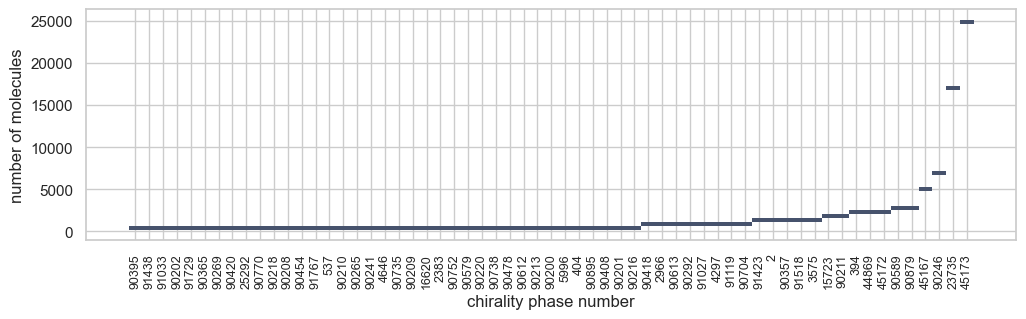

In [12]:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)

sns.histplot(data=scp_no_df, x='csp_no', y='mol_num', ax=ax)
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("chirality phase number")
plt.ylabel("number of molecules")

plt.savefig('./csp_no_stat.png', dpi=300, bbox_inches='tight')
plt.show()